In [54]:
import pandas as pd

In [55]:
df= pd.read_csv("aepTrainingData.csv")

In [56]:
column = df.columns

In [57]:
features=[feature for feature in df.columns if df[feature].dtype=='O']

In [58]:
df['operatingCompany'].unique()

array(['aepAppalachia', 'aepIndianaMichigan', 'aepKentucky', 'aepOhio',
       'aepOklahoma', 'aepSouthwest', 'aepTexas'], dtype=object)

In [59]:
df['districtId'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [60]:
df1=df.iloc[:,0:23]

In [61]:
df2=df.iloc[:,-6:]

In [62]:
df1= pd.concat([df1,df2],axis=1)

In [63]:
df1=df1[df1['operatingCompany'] !='aepKentucky']

In [64]:
# First, ensure that XFMR-UG is not in the dataset and adjust accordingly
df1['XFMR-TOTAL'] = df1['XFMR-OH'] + df1['XFMR-UG']   # Assuming no XFMR-UG based on previous error

# Calculate combined metrics
df1['CONDUCTOR-TOTAL'] = df1['OH-COND'] + df1['UG-COND']

# Find 95th percentile values for each metric by district and operating company
percentiles = df1[['customersInterrupted', 'OH-COND', 'UG-COND', 'POLE', 'XFMR-OH']].quantile(0.95)

In [65]:
# Calculate the 95th percentile for each metric across the entire dataset
overall_percentiles = df1[['customersInterrupted', 'CONDUCTOR-TOTAL', 'POLE', 'XFMR-TOTAL']].quantile(0.95)
overall_percentiles

customersInterrupted    3688.0
CONDUCTOR-TOTAL            6.0
POLE                       2.0
XFMR-TOTAL                 3.0
Name: 0.95, dtype: float64

In [46]:
# Identify rows where any metric exceeds its respective 95th percentile
exceptionally_high_events = df1[
    (df1['customersInterrupted'] > overall_percentiles['customersInterrupted']) |
    (df1['CONDUCTOR-TOTAL'] > overall_percentiles['CONDUCTOR-TOTAL']) |
    (df1['POLE'] > overall_percentiles['POLE']) |
    (df1['XFMR-TOTAL'] > overall_percentiles['XFMR-TOTAL'])
]


In [47]:

# Sort these events by the magnitude of exceedance and select the top 5
top_5_major_events = exceptionally_high_events.sort_values(
    by=['customersInterrupted', 'CONDUCTOR-TOTAL', 'POLE', 'XFMR-TOTAL'],
    ascending=False
).head(5)

top_5_major_events[['districtId', 'operatingCompany', 'date', 'customersInterrupted', 'CONDUCTOR-TOTAL', 'POLE', 'XFMR-TOTAL']]

,districtId,operatingCompany,date,customersInterrupted,CONDUCTOR-TOTAL,POLE,XFMR-TOTAL
43708,2,aepTexas,20170825,177440,33,19,1
31836,3,aepOklahoma,20160714,93330,41,4,10
44212,2,aepTexas,20160319,85332,109,26,23
7180,5,aepAppalachia,20170301,76992,3,4,3
34623,2,aepSouthwest,20170528,66035,12,3,6


In [48]:

# Sort these events by the magnitude of exceedance and select the top 5
top_5_major_events1 = exceptionally_high_events.sort_values(
    by=['CONDUCTOR-TOTAL','customersInterrupted', 'POLE', 'XFMR-TOTAL'],
    ascending=False
).head(5)

top_5_major_events1[['districtId', 'operatingCompany', 'date', 'customersInterrupted', 'CONDUCTOR-TOTAL', 'POLE', 'XFMR-TOTAL']]

,districtId,operatingCompany,date,customersInterrupted,CONDUCTOR-TOTAL,POLE,XFMR-TOTAL
26259,6,aepOhio,20190224,52116,177,28,12
746,1,aepAppalachia,20180302,62367,139,35,6
7740,1,aepIndianaMichigan,20191127,20845,128,14,0
11034,3,aepIndianaMichigan,20190212,11938,124,4,0
7986,1,aepIndianaMichigan,20190224,35852,118,20,4


In [49]:
# Sort these events by the magnitude of exceedance and select the top 5
top_5_major_events2 = exceptionally_high_events.sort_values(
    by=['POLE','CONDUCTOR-TOTAL','customersInterrupted','XFMR-TOTAL'],
    ascending=False
).head(5)

top_5_major_events2[['districtId', 'operatingCompany', 'date', 'customersInterrupted', 'CONDUCTOR-TOTAL', 'POLE', 'XFMR-TOTAL']]

,districtId,operatingCompany,date,customersInterrupted,CONDUCTOR-TOTAL,POLE,XFMR-TOTAL
746,1,aepAppalachia,20180302,62367,139,35,6
26259,6,aepOhio,20190224,52116,177,28,12
44212,2,aepTexas,20160319,85332,109,26,23
24741,5,aepOhio,20190224,30686,90,25,1
33586,2,aepSouthwest,20200412,45988,42,23,9


In [50]:
# Sort these events by the magnitude of exceedance and select the top 5
top_5_major_events3 = exceptionally_high_events.sort_values(
    by=['XFMR-TOTAL','POLE','CONDUCTOR-TOTAL','customersInterrupted'],
    ascending=False
).head(5)

top_5_major_events3[['districtId', 'operatingCompany', 'date', 'customersInterrupted', 'CONDUCTOR-TOTAL', 'POLE', 'XFMR-TOTAL']]

,districtId,operatingCompany,date,customersInterrupted,CONDUCTOR-TOTAL,POLE,XFMR-TOTAL
46560,4,aepTexas,20180102,9613,16,1,59
43796,2,aepTexas,20170529,19342,42,3,44
46545,4,aepTexas,20180117,6482,16,0,42
46561,4,aepTexas,20180101,9483,14,1,37
45287,3,aepTexas,20170529,12997,20,4,33


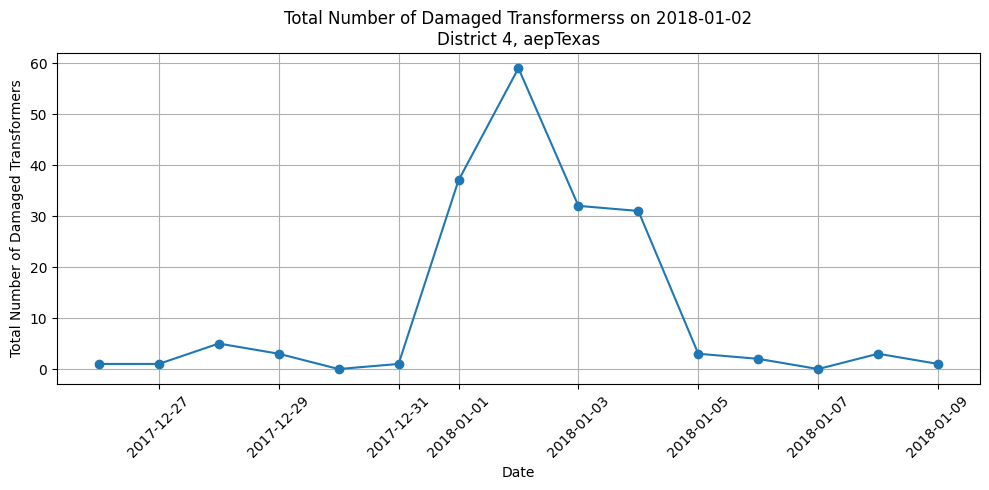

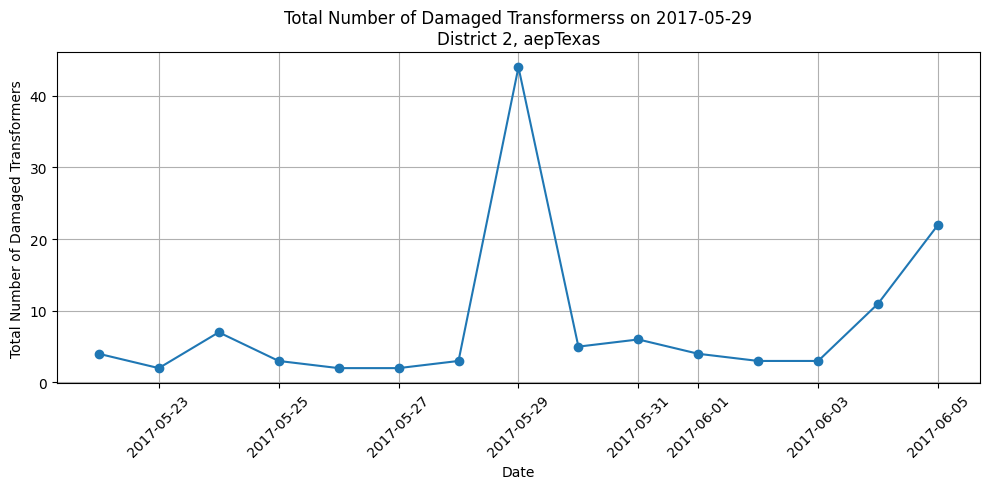

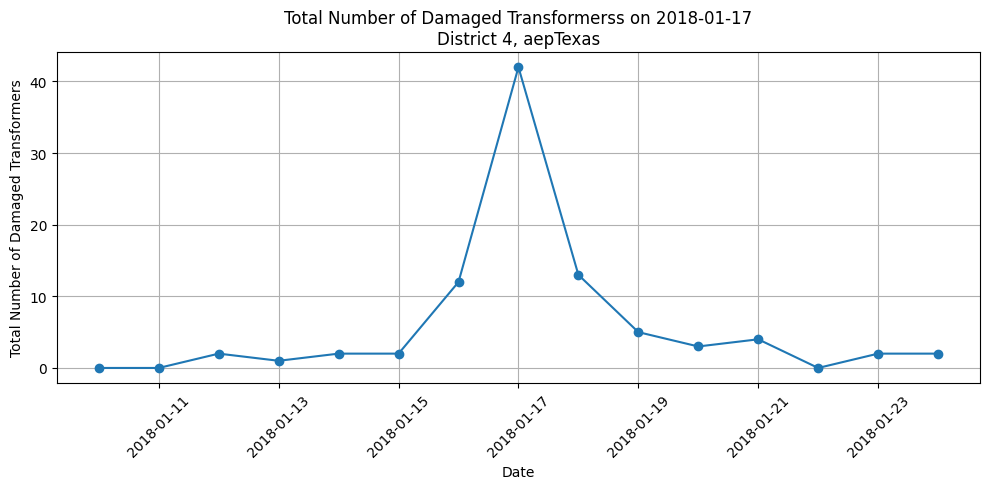

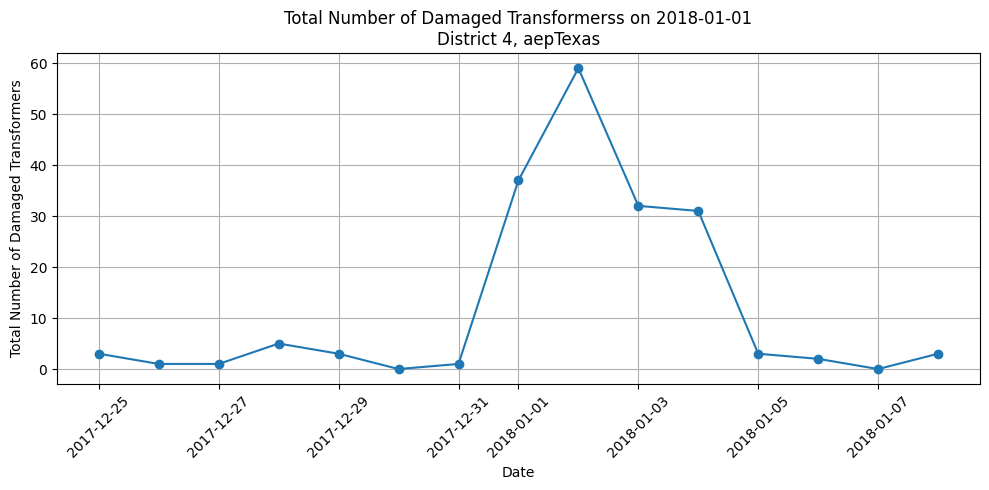

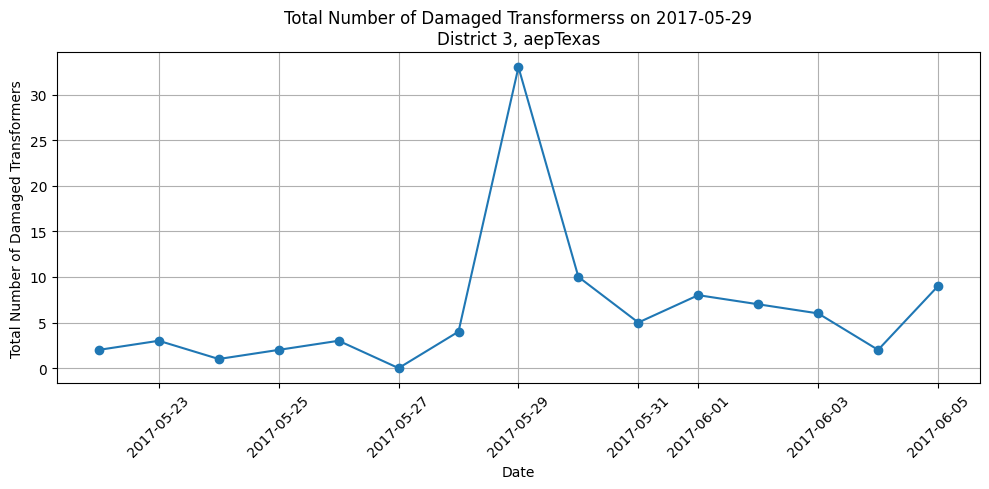

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'date' column to datetime format for the entire dataset
df1['date'] = pd.to_datetime(df1['date'].astype(str), errors='coerce')  # Handle any errors in conversion by setting them to NaT

# Update the date in the top_5_major_events DataFrame as well
top_5_major_events3['date'] = pd.to_datetime(top_5_major_events3['date'].astype(str), errors='coerce')  # Assume top_5_major_events2 is correct

# Function to plot the graph for each major event
def plot_event_data3(event_row):
    # Extracting event details
    district_id = event_row['districtId']
    company = event_row['operatingCompany']
    event_date = event_row['date']
    
    # Check if event_date is NaT
    if pd.isna(event_date):
        print(f"Skipping plot for district {district_id}, {company} due to invalid date.")
        return
    
    # Define the date range from -7 to +7 days of the event
    start_date = event_date - pd.Timedelta(days=7)
    end_date = event_date + pd.Timedelta(days=7)
    
    # Filter data for the specific district and date range
    mask = (df1['districtId'] == district_id) & (df1['operatingCompany'] == company) & \
           (df1['date'] >= start_date) & (df1['date'] <= end_date)
    district_data = df1[mask]
    
    # Sorting data by date to ensure the line plot is correct
    district_data = district_data.sort_values(by='date')
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(district_data['date'], district_data['XFMR-TOTAL'], marker='o', linestyle='-')
    plt.title(f"Total Number of Damaged Transformerss on {event_date.strftime('%Y-%m-%d') if not pd.isna(event_date) else 'Invalid Date'}\nDistrict {district_id}, {company}")
    plt.xlabel('Date')
    plt.ylabel('Total Number of Damaged Transformers')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Re-plotting the graphs using the corrected date format
for index, event_row in top_5_major_events3.iterrows():
    plot_event_data3(event_row)  # Make sure to use the correct function name


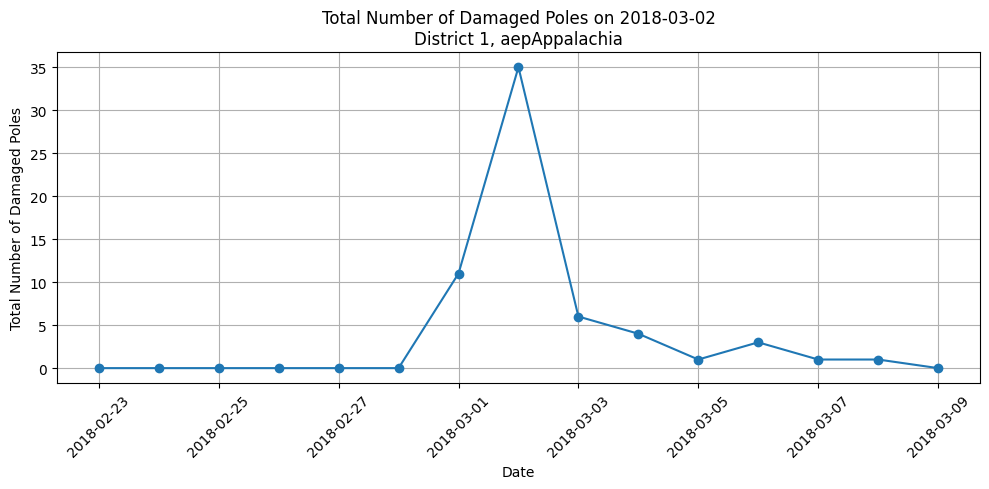

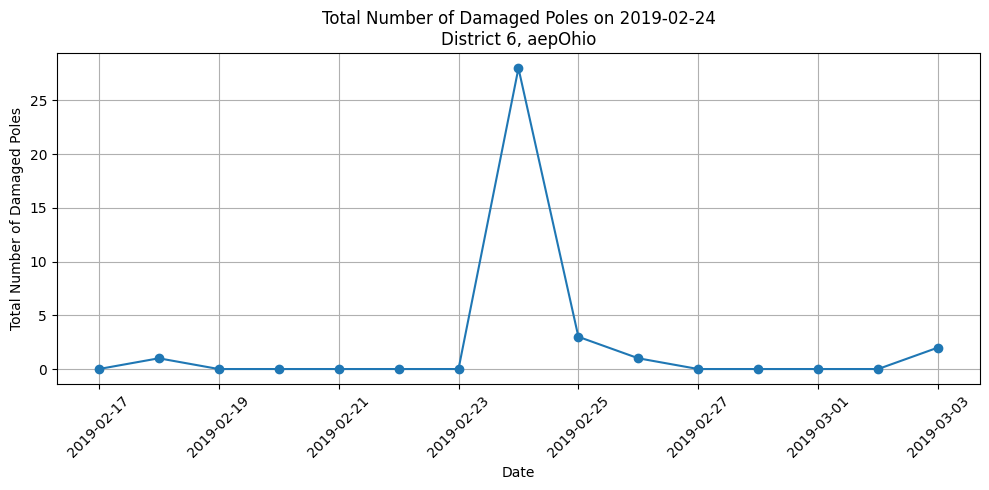

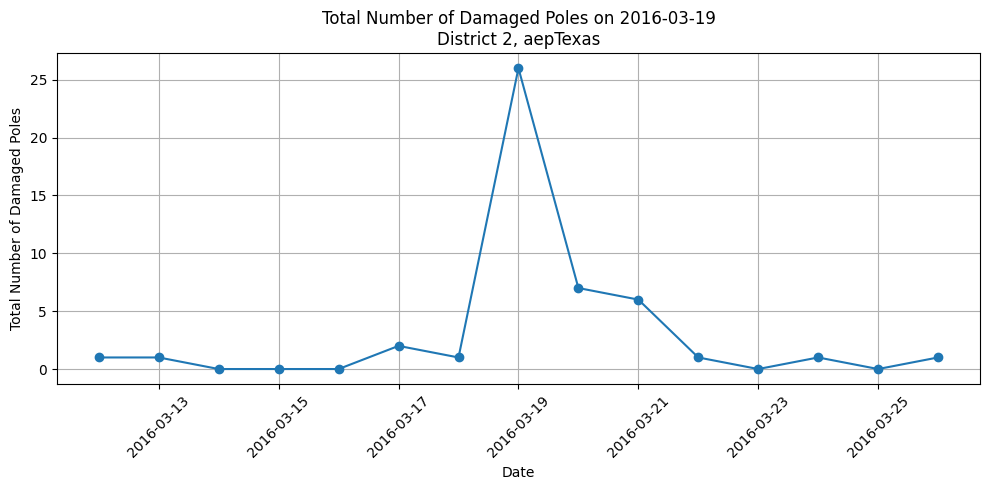

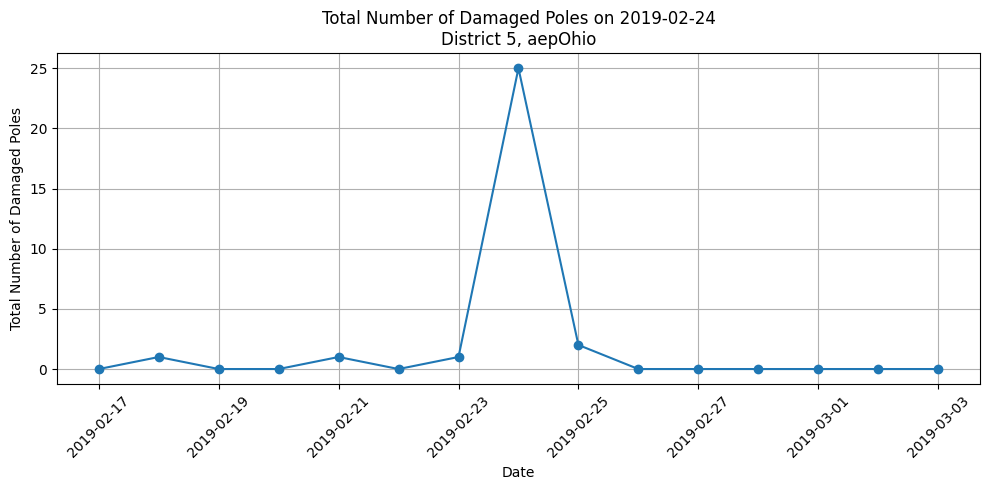

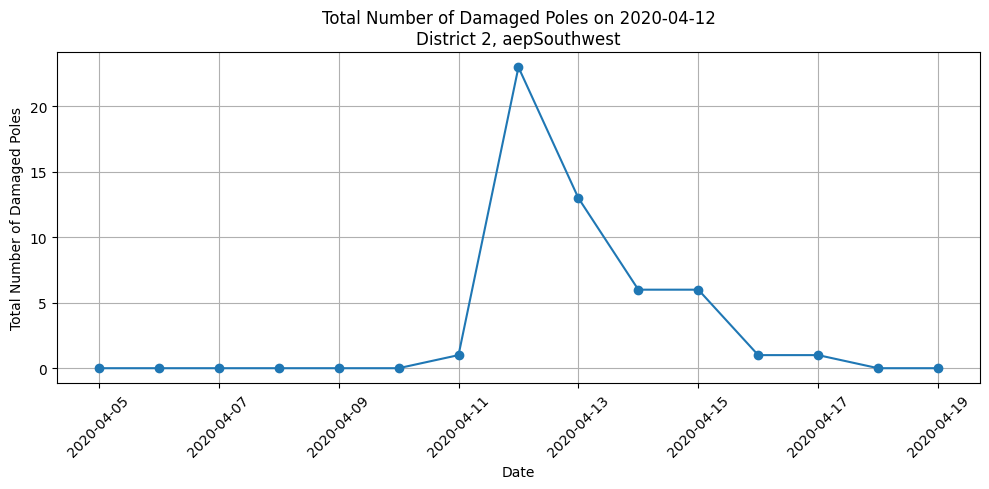

In [80]:
import matplotlib.pyplot as plt
import pandas as pd



# Update the date in the top_5_major_events DataFrame as well
top_5_major_events2['date'] = pd.to_datetime(top_5_major_events2['date'].astype(str), errors='coerce')  # Assume top_5_major_events2 is correct

# Function to plot the graph for each major event
def plot_event_data2(event_row):
    # Extracting event details
    district_id = event_row['districtId']
    company = event_row['operatingCompany']
    event_date = event_row['date']
    
    # Check if event_date is NaT
    if pd.isna(event_date):
        print(f"Skipping plot for district {district_id}, {company} due to invalid date.")
        return
    
    # Define the date range from -7 to +7 days of the event
    start_date = event_date - pd.Timedelta(days=7)
    end_date = event_date + pd.Timedelta(days=7)
    
    # Filter data for the specific district and date range
    mask = (df1['districtId'] == district_id) & (df1['operatingCompany'] == company) & \
           (df1['date'] >= start_date) & (df1['date'] <= end_date)
    district_data = df1[mask]
    
    # Sorting data by date to ensure the line plot is correct
    district_data = district_data.sort_values(by='date')
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(district_data['date'], district_data['POLE'], marker='o', linestyle='-')
    plt.title(f"Total Number of Damaged Poles on {event_date.strftime('%Y-%m-%d') if not pd.isna(event_date) else 'Invalid Date'}\nDistrict {district_id}, {company}")
    plt.xlabel('Date')
    plt.ylabel('Total Number of Damaged Poles')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Re-plotting the graphs using the corrected date format
for index, event_row in top_5_major_events2.iterrows():
    plot_event_data2(event_row)  # Make sure to use the correct function name


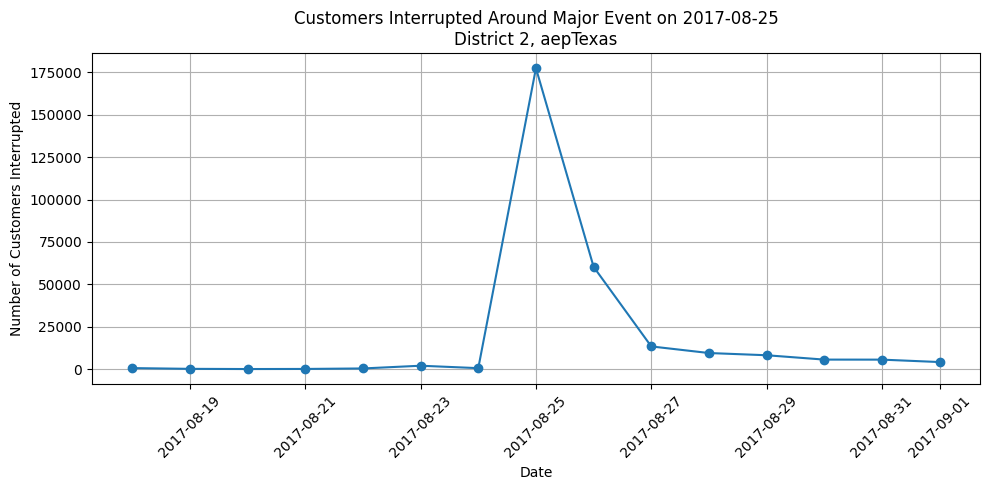

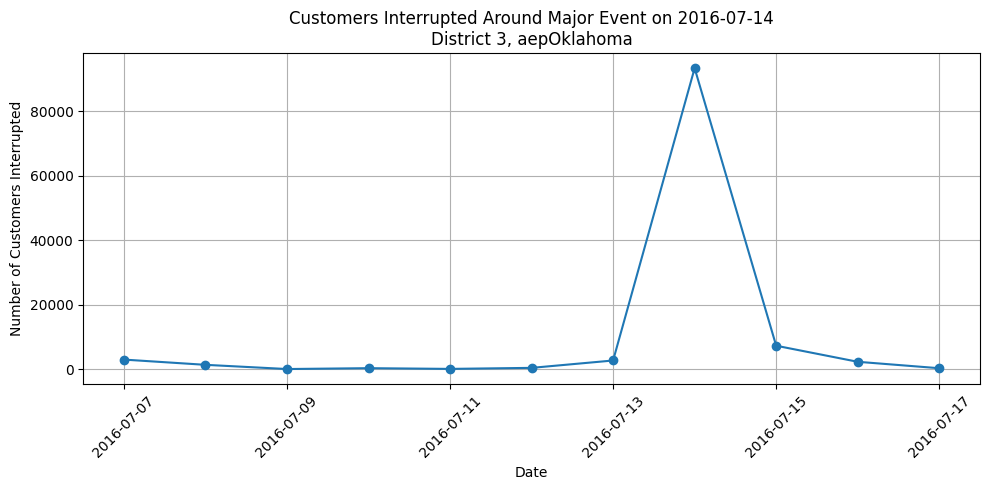

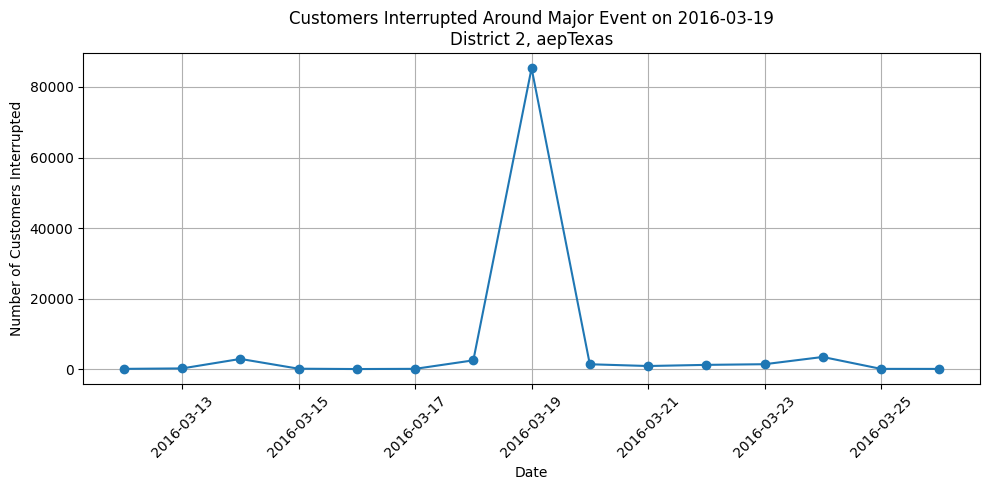

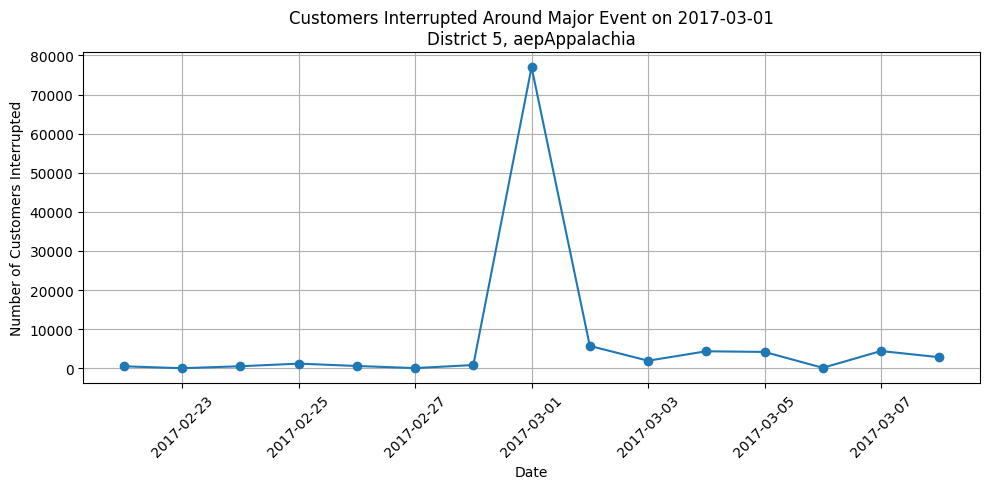

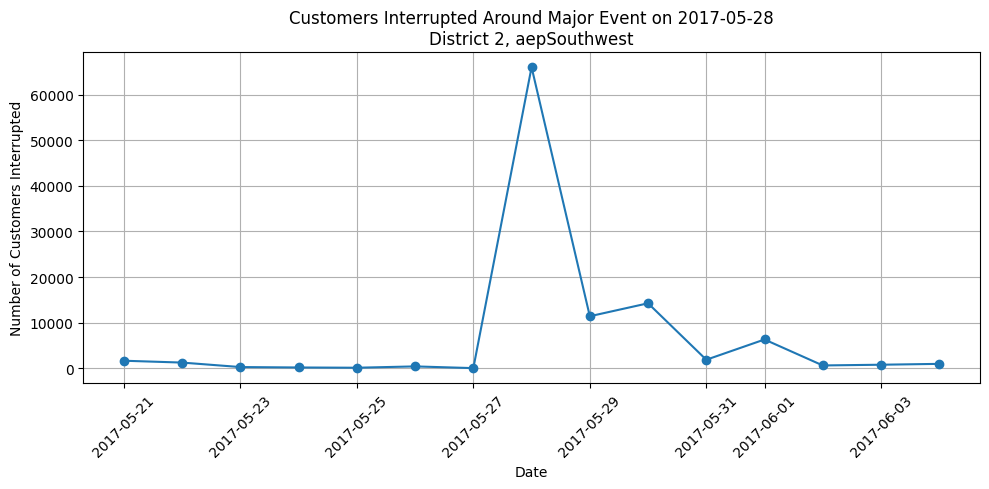

In [81]:
import matplotlib.pyplot as plt




# Function to plot the graph for each major event
def plot_event_data(event_row):
    # Extracting event details
    district_id = event_row['districtId']
    company = event_row['operatingCompany']
    event_date = event_row['date']
    
    # Define the date range from -7 to +7 days of the event
    start_date = event_date - pd.Timedelta(days=7)
    end_date = event_date + pd.Timedelta(days=7)
    
    # Filter data for the specific district and date range
    mask = (df1['districtId'] == district_id) & (df1['operatingCompany'] == company) & \
           (df1['date'] >= start_date) & (df1['date'] <= end_date)
    district_data = df1[mask]
    
    # Sorting data by date to ensure the line plot is correct
    district_data = district_data.sort_values(by='date')
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(district_data['date'], district_data['customersInterrupted'], marker='o', linestyle='-')
    plt.title(f"Customers Interrupted Around Major Event on {event_date.strftime('%Y-%m-%d')}\nDistrict {district_id}, {company}")
    plt.xlabel('Date')
    plt.ylabel('Number of Customers Interrupted')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Convert the 'date' column to datetime format for the entire dataset
#df1['date'] = pd.to_datetime(df1['date'].astype(str), format='%Y%m%d')

# Update the date in the top_5_major_events DataFrame as well
top_5_major_events['date'] = pd.to_datetime(top_5_major_events['date'].astype(str), format='%Y%m%d')

# Re-plotting the graphs using the corrected date format
for index, event_row in top_5_major_events.iterrows():
    plot_event_data(event_row)

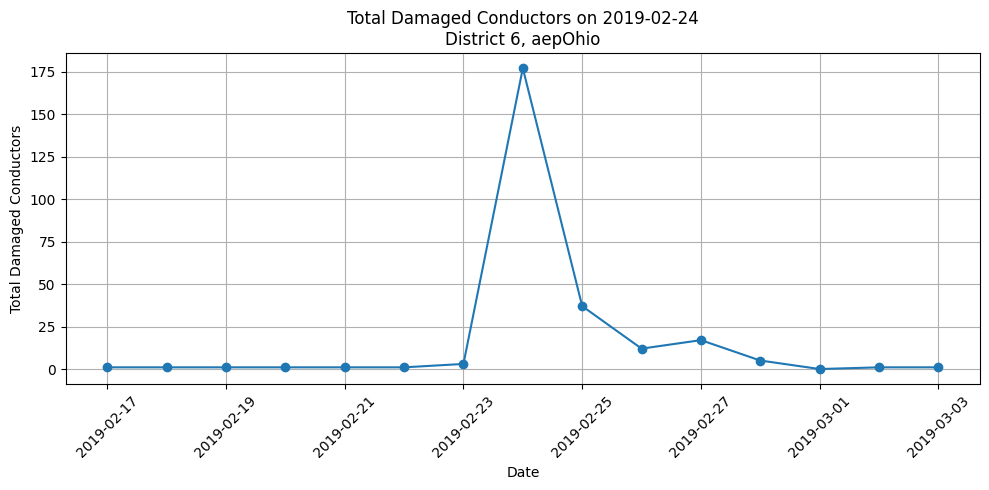

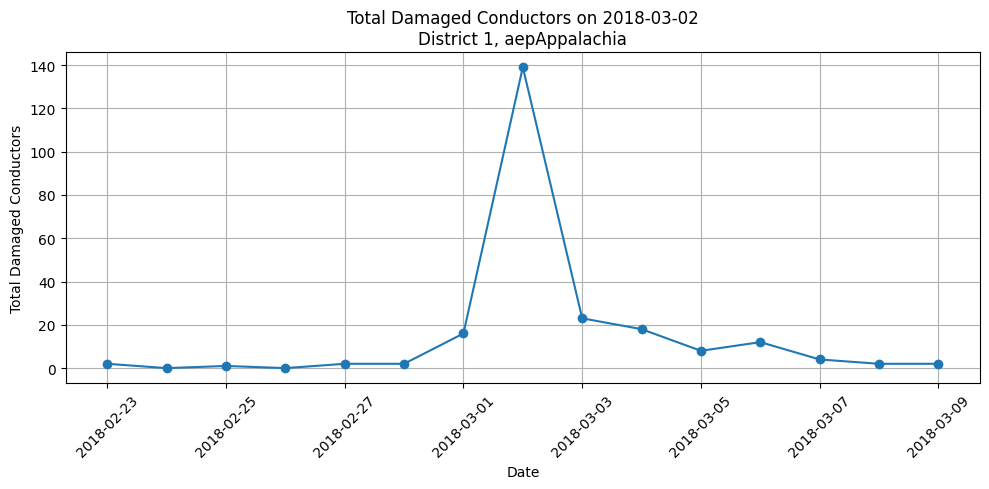

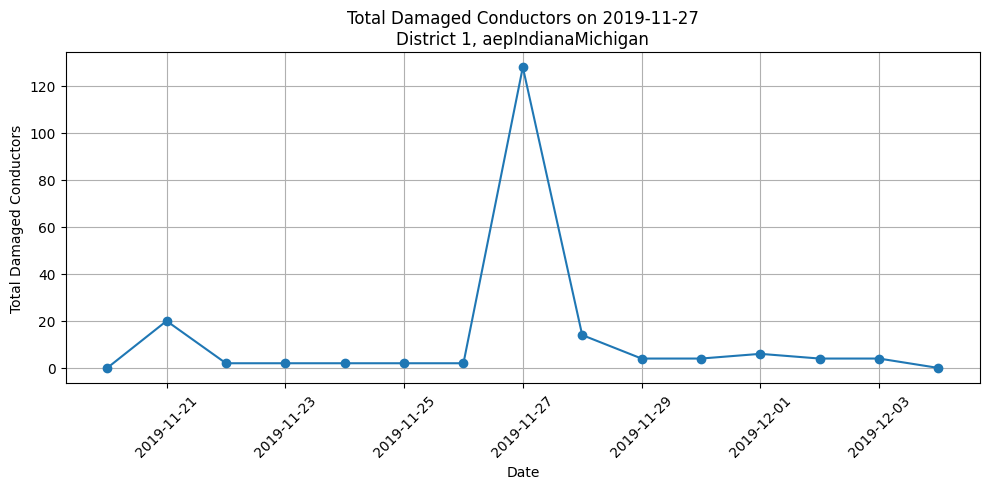

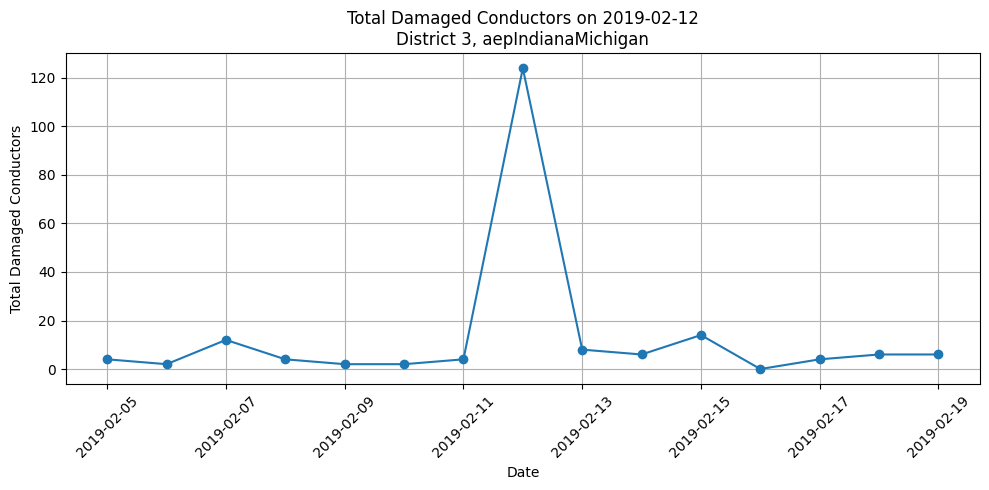

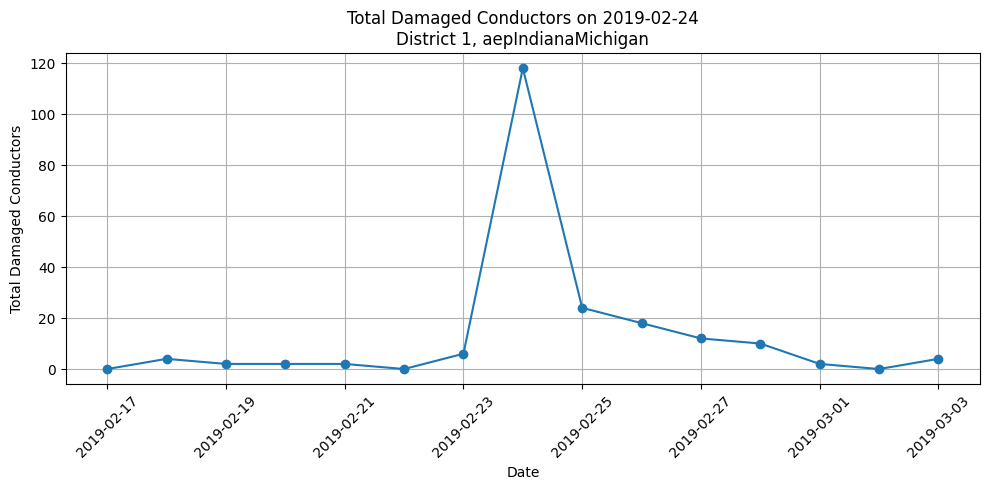

In [82]:
import matplotlib.pyplot as plt


# Function to plot the graph for each major event
def plot_event_data1(event_row):
    # Extracting event details
    district_id = event_row['districtId']
    company = event_row['operatingCompany']
    event_date = event_row['date']
    
    # Define the date range from -7 to +7 days of the event
    start_date = event_date - pd.Timedelta(days=7)
    end_date = event_date + pd.Timedelta(days=7)
    
    # Filter data for the specific district and date range
    mask = (df1['districtId'] == district_id) & (df1['operatingCompany'] == company) & \
           (df1['date'] >= start_date) & (df1['date'] <= end_date)
    district_data = df1[mask]
    
    # Sorting data by date to ensure the line plot is correct
    district_data = district_data.sort_values(by='date')
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(district_data['date'], district_data['CONDUCTOR-TOTAL'], marker='o', linestyle='-')
    plt.title(f"Total Damaged Conductors on {event_date.strftime('%Y-%m-%d')}\nDistrict {district_id}, {company}")
    plt.xlabel('Date')
    plt.ylabel('Total Damaged Conductors')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Convert the 'date' column to datetime format for the entire dataset
#df1['date'] = pd.to_datetime(df1['date'].astype(str), format='%Y%m%d')

# Update the date in the top_5_major_events DataFrame as well
top_5_major_events1['date'] = pd.to_datetime(top_5_major_events1['date'].astype(str), format='%Y%m%d')

# Re-plotting the graphs using the corrected date format
for index, event_row in top_5_major_events1.iterrows():
    plot_event_data1(event_row)

In [51]:
# Convert 'year', 'month', 'day' into a single datetime column for easier grouping
df1['date'] = pd.to_datetime(df1[['year', 'month', 'day']])

# Group by 'operatingCompany' and 'date', then sum the specified columns
aggregated_data = df1.groupby(['operatingCompany', 'date']).agg({
    'customersInterrupted': 'sum',
    'POLE': 'sum',
    'XFMR-TOTAL': 'sum',
    'CONDUCTOR-TOTAL': 'sum'
}).reset_index()

# Display the new aggregated dataframe
aggregated_data.head()

,operatingCompany,date,customersInterrupted,POLE,XFMR-TOTAL,CONDUCTOR-TOTAL
0,aepAppalachia,2016-01-01,3354,0,2,3
1,aepAppalachia,2016-01-02,3878,0,1,6
2,aepAppalachia,2016-01-03,161,0,2,8
3,aepAppalachia,2016-01-05,3804,0,5,8
4,aepAppalachia,2016-01-06,1740,0,8,10


In [66]:
# Calculate the 95th percentile for each specified column
quantiles = aggregated_data[['customersInterrupted', 'POLE', 'XFMR-TOTAL', 'CONDUCTOR-TOTAL']].quantile(0.95)

# Filter events where any of the columns exceeds its 95th percentile
major_events = aggregated_data[
    (aggregated_data['customersInterrupted'] > quantiles['customersInterrupted']) |
    (aggregated_data['POLE'] > quantiles['POLE']) |
    (aggregated_data['XFMR-TOTAL'] > quantiles['XFMR-TOTAL']) |
    (aggregated_data['CONDUCTOR-TOTAL'] > quantiles['CONDUCTOR-TOTAL'])
]

# For each column, get the top 5 major events
top_customersInterrupted = major_events.nlargest(5, 'customersInterrupted')
top_POLE = major_events.nlargest(5, 'POLE')
top_XFMR_TOTAL = major_events.nlargest(5, 'XFMR-TOTAL')
top_CONDUCTOR_TOTAL = major_events.nlargest(5, 'CONDUCTOR-TOTAL')


In [69]:
top_customersInterrupted

,operatingCompany,date,customersInterrupted,POLE,XFMR-TOTAL,CONDUCTOR-TOTAL
8230,aepTexas,2017-08-25,178526,22,5,50
4151,aepOhio,2019-02-24,166135,109,25,608
404,aepAppalachia,2017-03-01,131013,10,6,7
1116,aepAppalachia,2019-02-24,115484,29,7,224
6593,aepSouthwest,2017-05-28,113472,4,13,44


In [70]:
top_POLE

,operatingCompany,date,customersInterrupted,POLE,XFMR-TOTAL,CONDUCTOR-TOTAL
4151,aepOhio,2019-02-24,166135,109,25,608
770,aepAppalachia,2018-03-02,86247,55,10,220
2879,aepIndianaMichigan,2019-11-27,49989,52,8,324
2633,aepIndianaMichigan,2019-02-24,66865,46,6,344
7726,aepTexas,2016-03-19,93807,41,36,127


In [71]:
top_XFMR_TOTAL

,operatingCompany,date,customersInterrupted,POLE,XFMR-TOTAL,CONDUCTOR-TOTAL
8360,aepTexas,2018-01-02,13771,1,98,31
8142,aepTexas,2017-05-29,36802,11,94,71
8359,aepTexas,2018-01-01,18723,1,83,27
8375,aepTexas,2018-01-17,11311,2,66,34
8361,aepTexas,2018-01-03,14363,1,52,29


In [72]:
top_CONDUCTOR_TOTAL

,operatingCompany,date,customersInterrupted,POLE,XFMR-TOTAL,CONDUCTOR-TOTAL
4151,aepOhio,2019-02-24,166135,109,25,608
2633,aepIndianaMichigan,2019-02-24,66865,46,6,344
2879,aepIndianaMichigan,2019-11-27,49989,52,8,324
2621,aepIndianaMichigan,2019-02-12,63385,14,0,323
4397,aepOhio,2019-11-27,64606,37,12,274


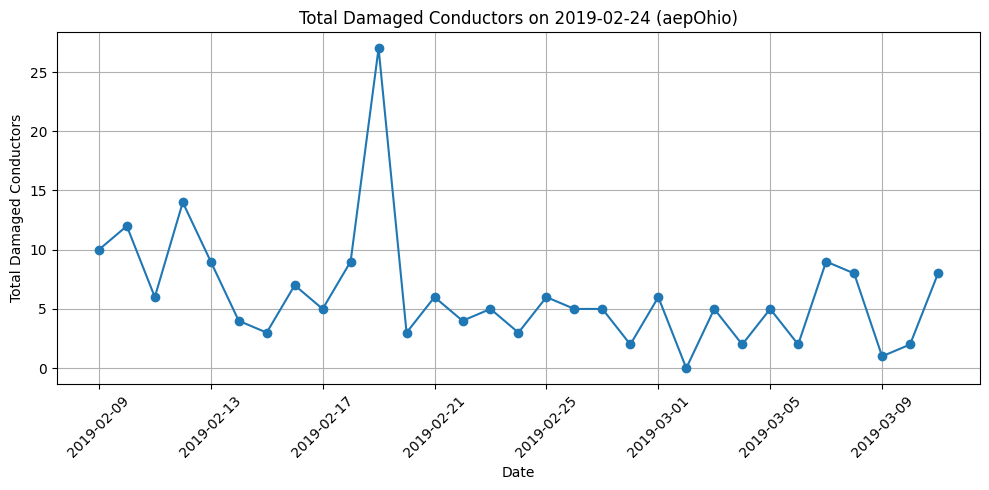

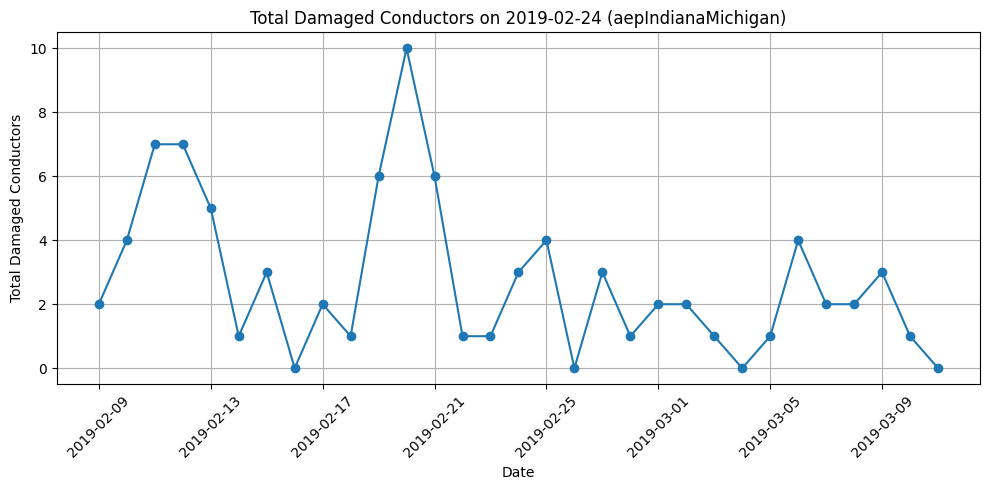

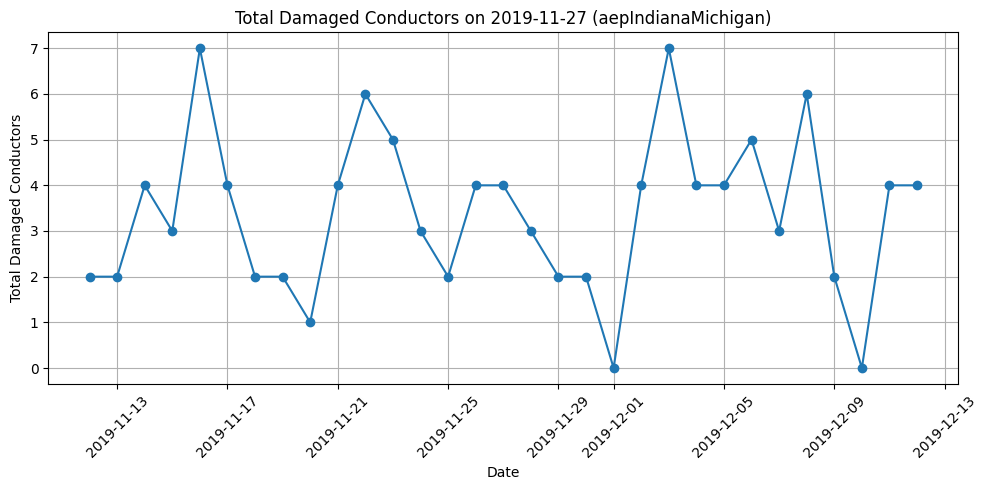

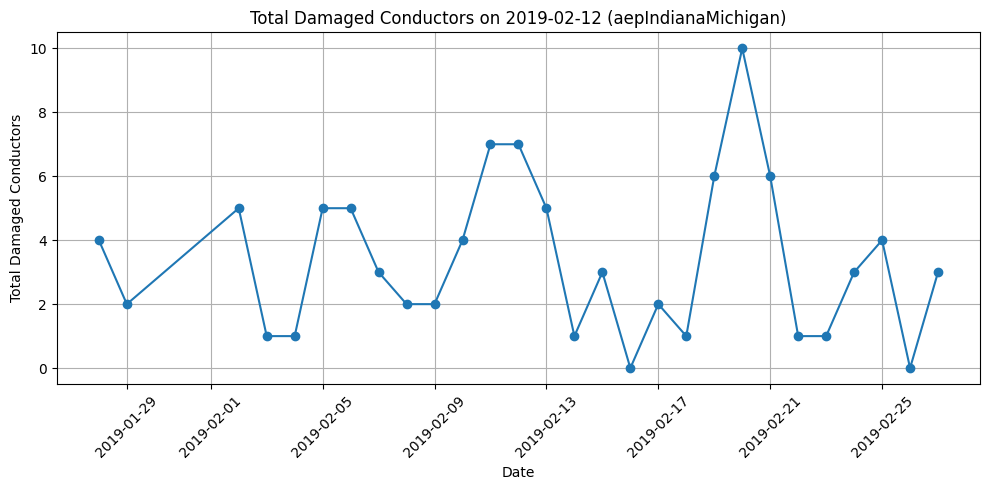

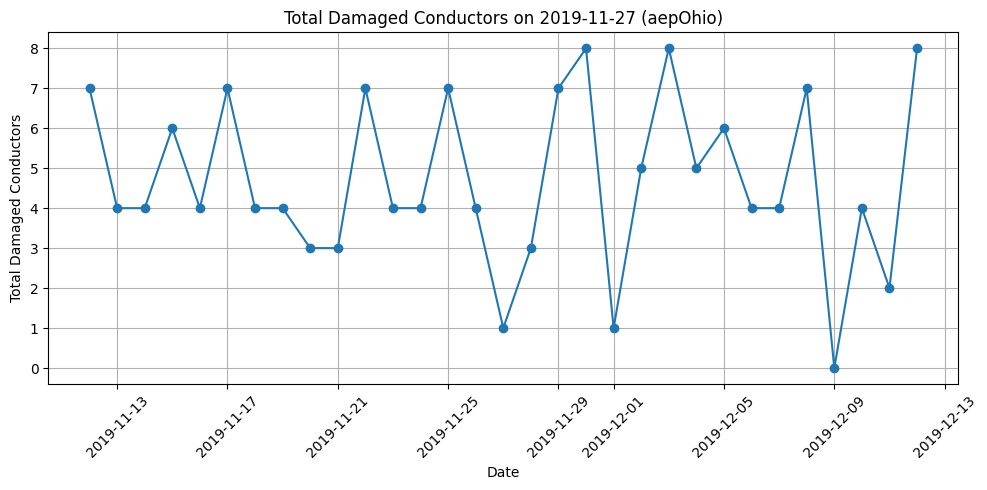

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'aggregated_data' is the correct DataFrame and already has a 'date' column of datetime type.
# If 'date' is not of datetime type, uncomment the next line to convert it.
# aggregated_data['date'] = pd.to_datetime(aggregated_data['date'], format='%Y-%m-%d')

# Function to plot the graph for each major event
def event_data1(event_row):
    # Extracting event details
    company = event_row['operatingCompany']
    event_date = event_row['date']
    
    # Define the date range from -15 to +15 days of the event
    start_date = event_date - pd.Timedelta(days=15)
    end_date = event_date + pd.Timedelta(days=15)
    
    # Filter data for the specific company and date range
    mask = ((aggregated_data['operatingCompany'] == company) &
            (aggregated_data['date'] >= start_date) &
            (aggregated_data['date'] <= end_date))
    district_data = aggregated_data[mask]
    
    # Sorting data by date to ensure the line plot is correct
    district_data = district_data.sort_values(by='date')
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(district_data['date'], district_data['CONDUCTOR-TOTAL'], marker='o', linestyle='-')
    plt.title(f"Total Damaged Conductors on {event_date.strftime('%Y-%m-%d')} ({company})")
    plt.xlabel('Date')
    plt.ylabel('Total Damaged Conductors')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Loop over each major event in top_CONDUCTOR_TOTAL and plot the data
for index, event_row in top_CONDUCTOR_TOTAL.iterrows():
    event_data1(event_row)


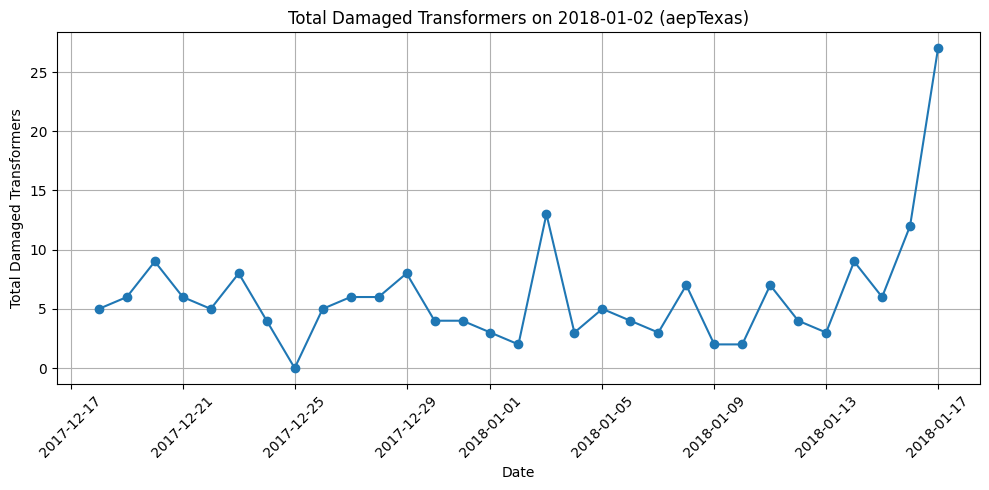

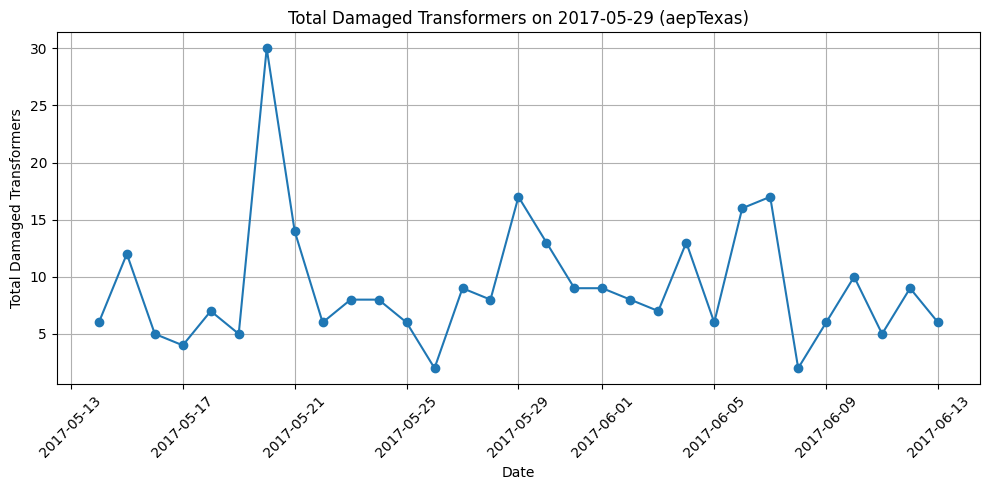

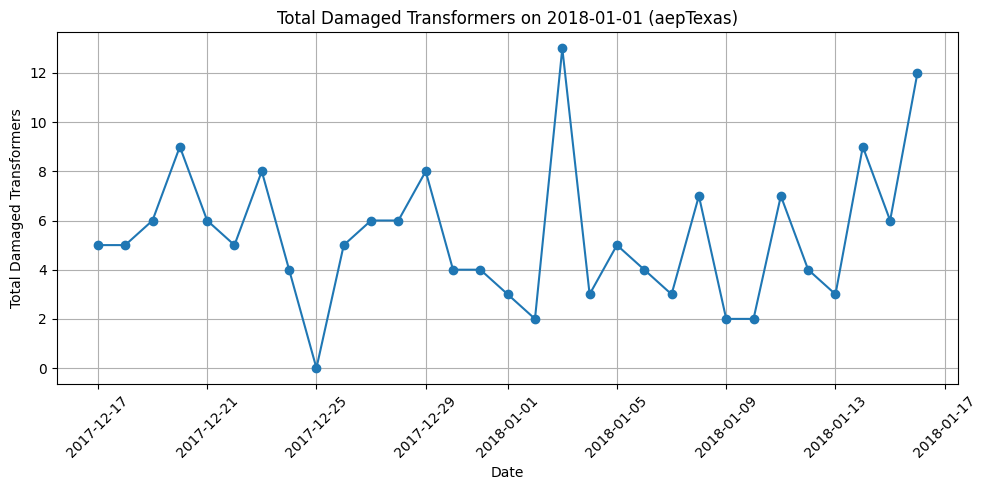

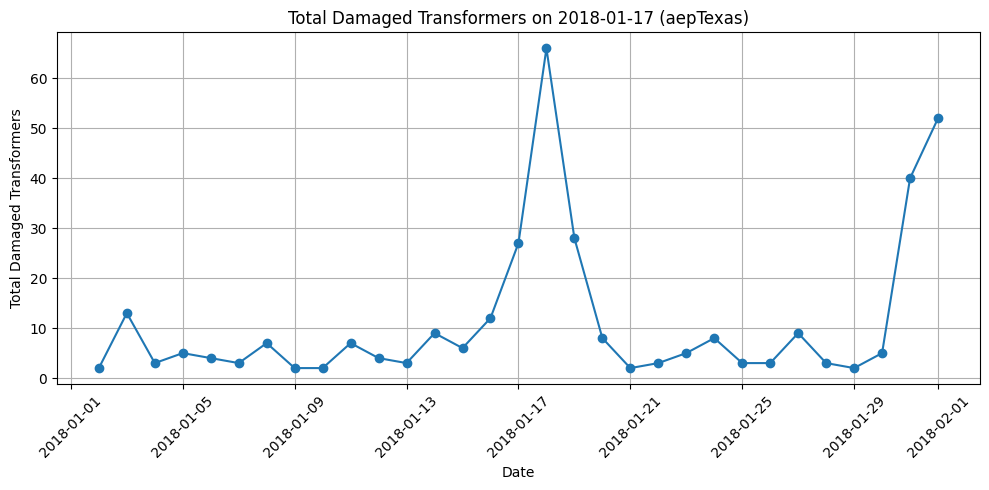

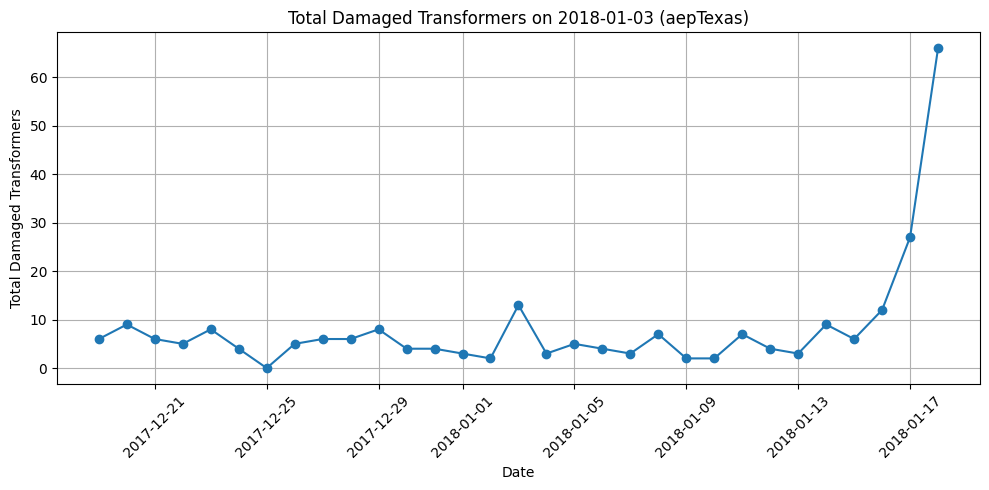

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'aggregated_data' is the correct DataFrame and already has a 'date' column of datetime type.
# If 'date' is not of datetime type, uncomment the next line to convert it.
# aggregated_data['date'] = pd.to_datetime(aggregated_data['date'], format='%Y-%m-%d')

# Function to plot the graph for each major event
def event_data2(event_row):
    # Extracting event details
    company = event_row['operatingCompany']
    event_date = event_row['date']
    
    # Define the date range from -15 to +15 days of the event
    start_date = event_date - pd.Timedelta(days=15)
    end_date = event_date + pd.Timedelta(days=15)
    
    # Filter data for the specific company and date range
    mask = ((aggregated_data['operatingCompany'] == company) &
            (aggregated_data['date'] >= start_date) &
            (aggregated_data['date'] <= end_date))
    district_data = aggregated_data[mask]
    
    # Sorting data by date to ensure the line plot is correct
    district_data = district_data.sort_values(by='date')
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(district_data['date'], district_data['XFMR-TOTAL'], marker='o', linestyle='-')
    plt.title(f"Total Damaged Transformers on {event_date.strftime('%Y-%m-%d')} ({company})")
    plt.xlabel('Date')
    plt.ylabel('Total Damaged Transformers')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Loop over each major event in top_CONDUCTOR_TOTAL and plot the data
for index, event_row in top_XFMR_TOTAL.iterrows():
    event_data2(event_row)


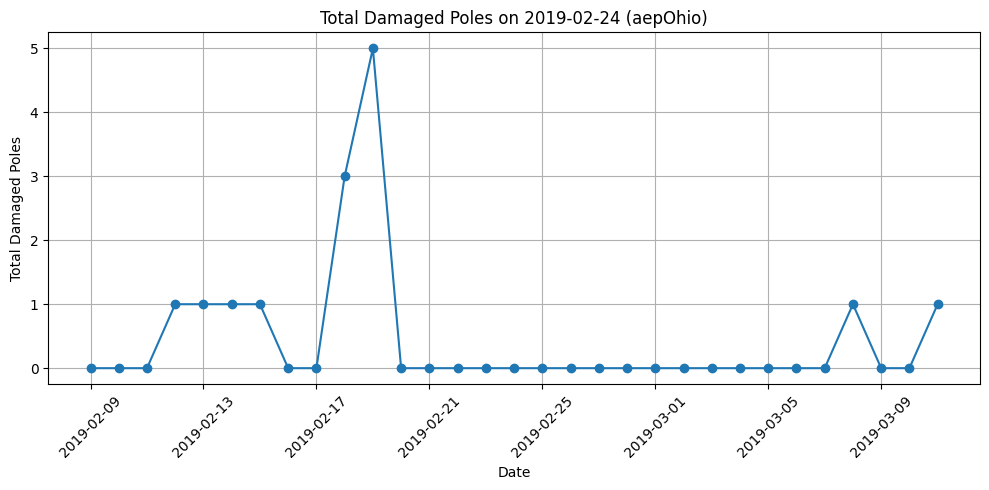

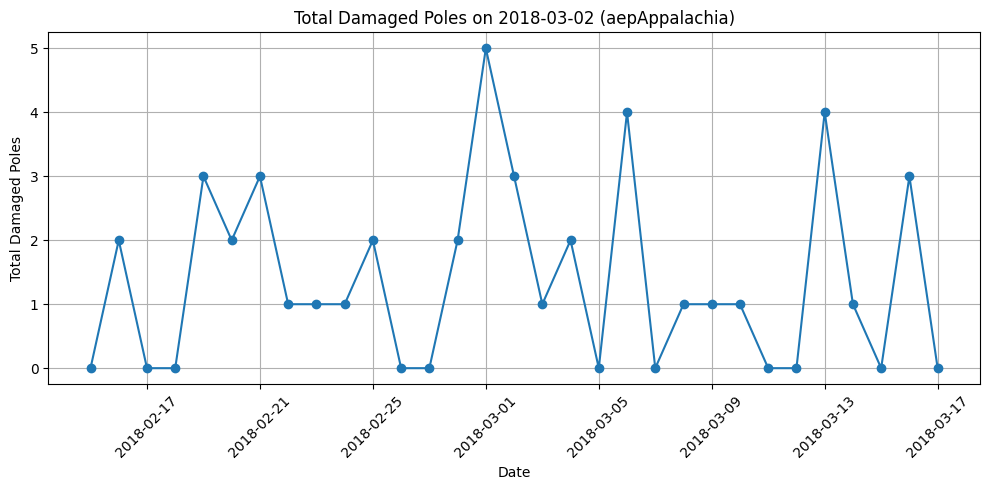

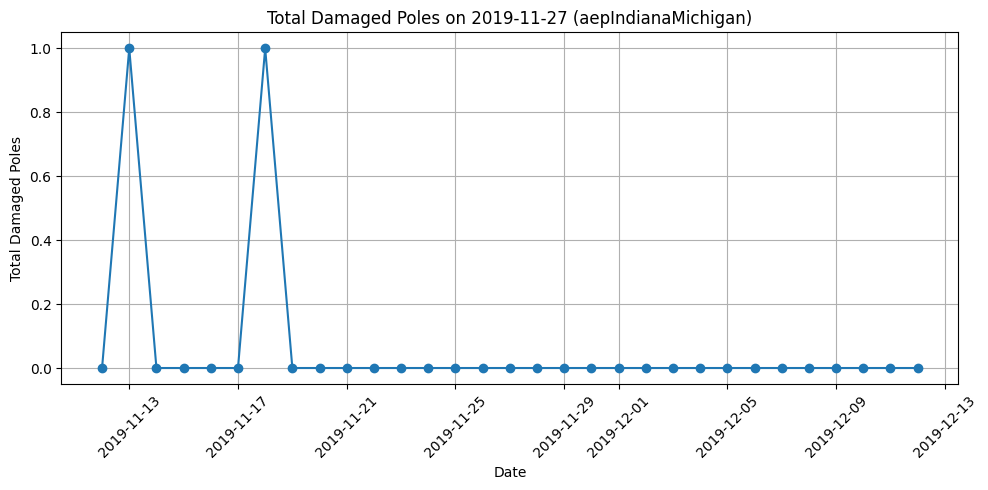

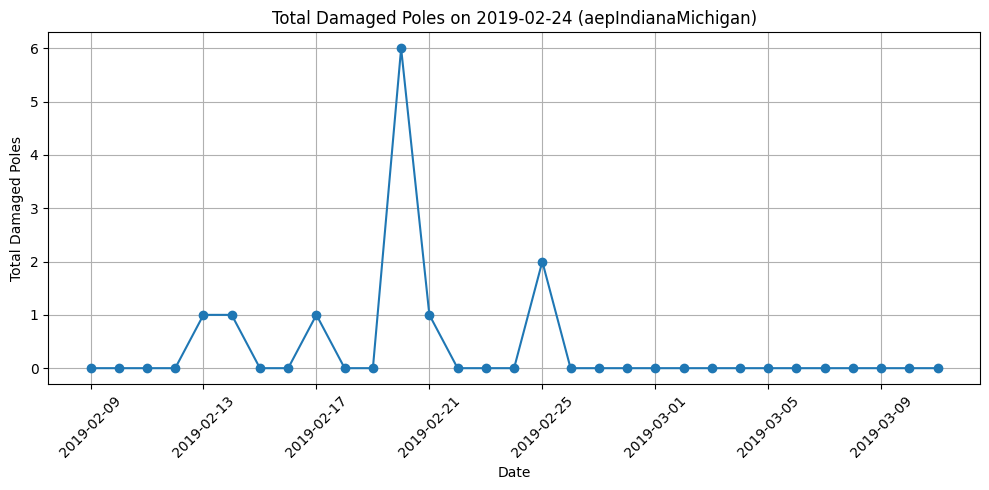

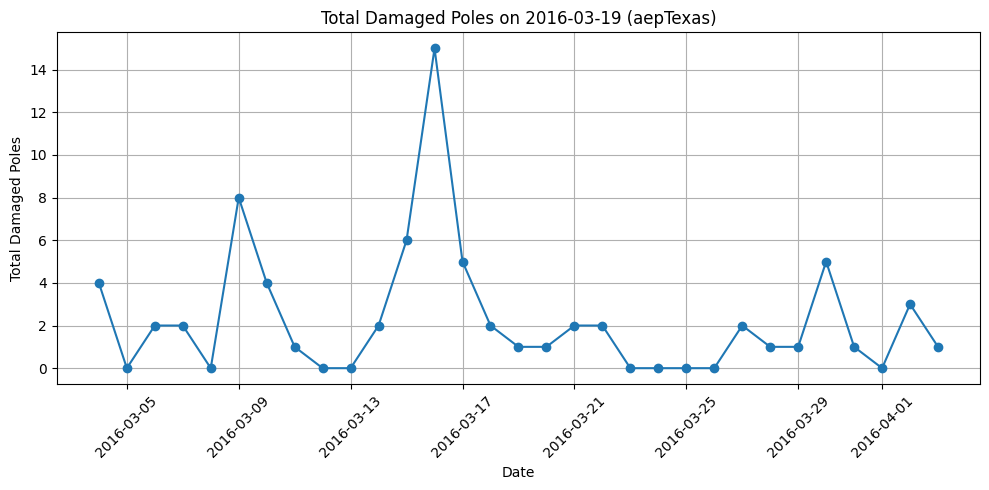

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'aggregated_data' is the correct DataFrame and already has a 'date' column of datetime type.
# If 'date' is not of datetime type, uncomment the next line to convert it.
# aggregated_data['date'] = pd.to_datetime(aggregated_data['date'], format='%Y-%m-%d')

# Function to plot the graph for each major event
def event_data3(event_row):
    # Extracting event details
    company = event_row['operatingCompany']
    event_date = event_row['date']
    
    # Define the date range from -15 to +15 days of the event
    start_date = event_date - pd.Timedelta(days=15)
    end_date = event_date + pd.Timedelta(days=15)
    
    # Filter data for the specific company and date range
    mask = ((aggregated_data['operatingCompany'] == company) &
            (aggregated_data['date'] >= start_date) &
            (aggregated_data['date'] <= end_date))
    district_data = aggregated_data[mask]
    
    # Sorting data by date to ensure the line plot is correct
    district_data = district_data.sort_values(by='date')
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(district_data['date'], district_data['POLE'], marker='o', linestyle='-')
    plt.title(f"Total Damaged Poles on {event_date.strftime('%Y-%m-%d')} ({company})")
    plt.xlabel('Date')
    plt.ylabel('Total Damaged Poles')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Loop over each major event in top_CONDUCTOR_TOTAL and plot the data
for index, event_row in top_POLE.iterrows():
    event_data3(event_row)


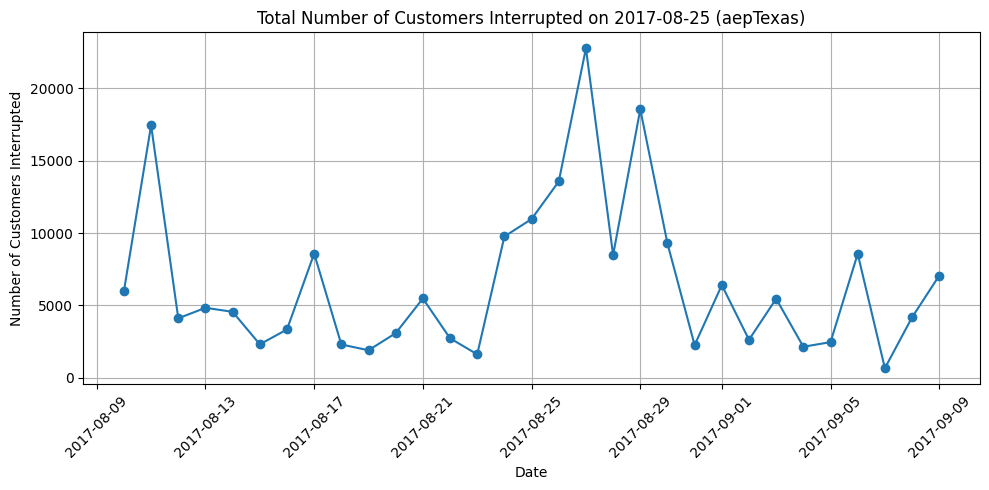

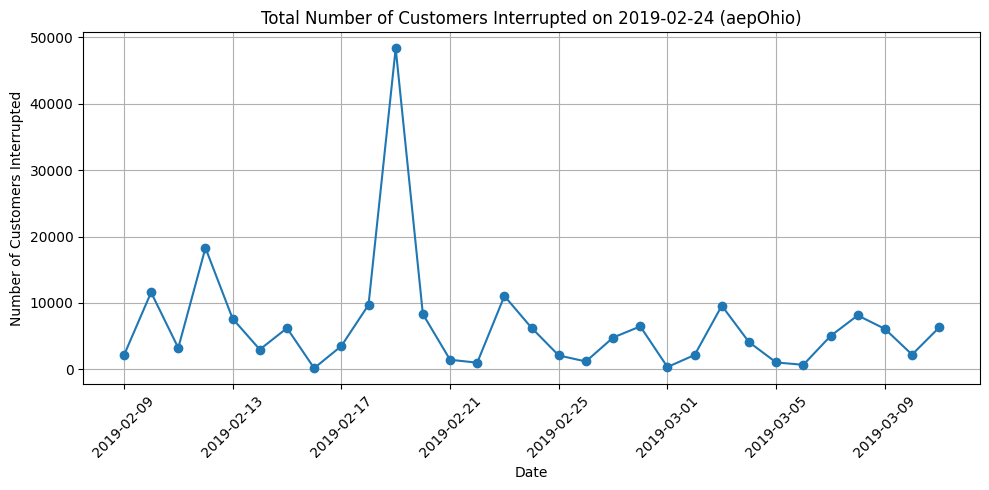

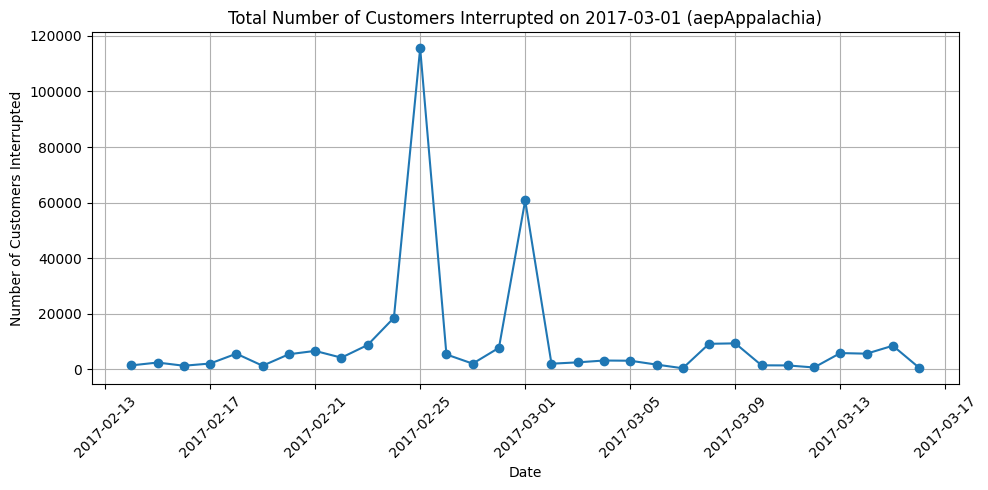

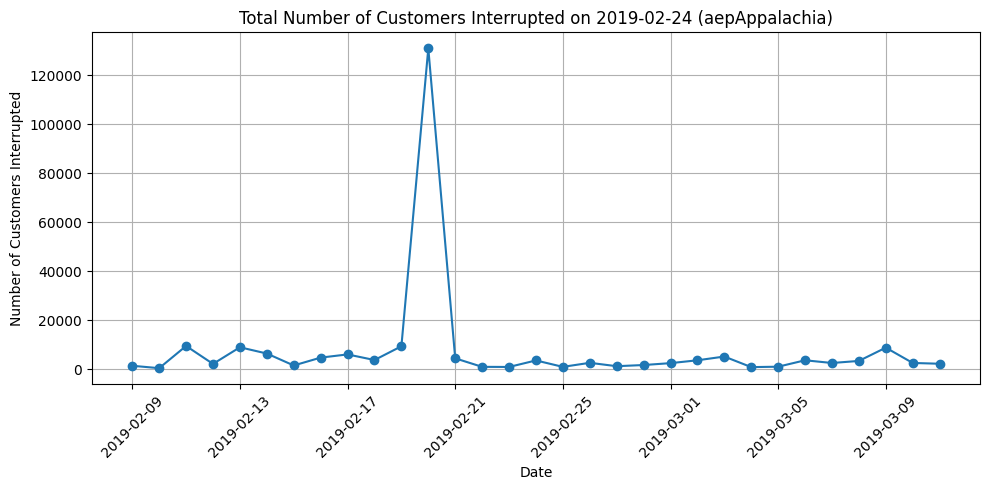

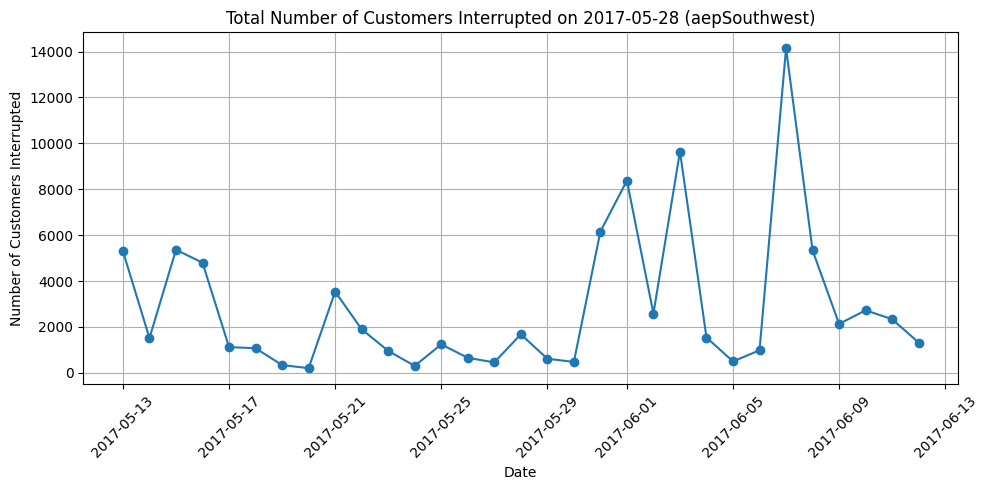

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'aggregated_data' is the correct DataFrame and already has a 'date' column of datetime type.
# If 'date' is not of datetime type, uncomment the next line to convert it.
# aggregated_data['date'] = pd.to_datetime(aggregated_data['date'], format='%Y-%m-%d')

# Function to plot the graph for each major event
def event_data4(event_row):
    # Extracting event details
    company = event_row['operatingCompany']
    event_date = event_row['date']
    
    # Define the date range from -15 to +15 days of the event
    start_date = event_date - pd.Timedelta(days=15)
    end_date = event_date + pd.Timedelta(days=15)
    
    # Filter data for the specific company and date range
    mask = ((aggregated_data['operatingCompany'] == company) &
            (aggregated_data['date'] >= start_date) &
            (aggregated_data['date'] <= end_date))
    district_data = aggregated_data[mask]
    
    # Sorting data by date to ensure the line plot is correct
    district_data = district_data.sort_values(by='date')
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(district_data['date'], district_data['customersInterrupted'], marker='o', linestyle='-')
    plt.title(f"Total Number of Customers Interrupted on {event_date.strftime('%Y-%m-%d')} ({company})")
    plt.xlabel('Date')
    plt.ylabel('Number of Customers Interrupted')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Loop over each major event in top_CONDUCTOR_TOTAL and plot the data
for index, event_row in top_customersInterrupted.iterrows():
    event_data4(event_row)
